In [1]:
import pandas as pd
import numpy as np

import h5py
from PIL import Image
import io
import matplotlib.pyplot as plt
import seaborn as sns

### Inspect Training Data
- image & metadata

Shape of the image: (139, 139, 3)


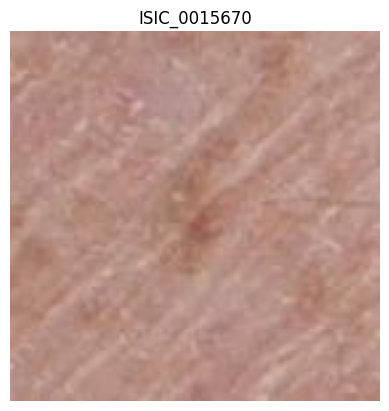

Shape of the image: (127, 127, 3)


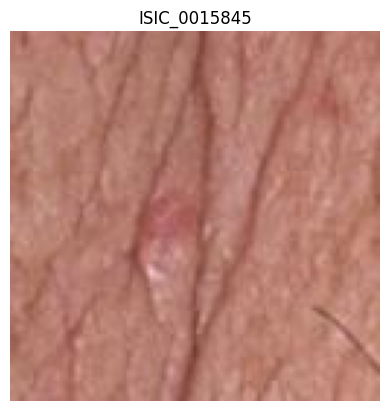

Shape of the image: (145, 145, 3)


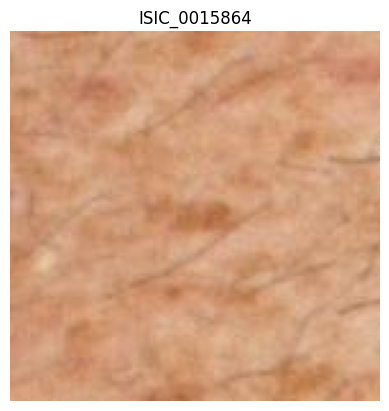

In [2]:
file_path = '../isic-2024-challenge/train-image.hdf5'
images = {}
max_images = 3
image_count = 0

with h5py.File(file_path, 'r') as file:
    for name, dataset in file.items():
        if image_count >= max_images:
            break
        
        # print(f'name = {name}, \n dataset = {dataset} \n shape = {dataset.shape}' )
        
        image_arr_bytes = dataset[()]
        # print(f"image array bytes = {image_arr_bytes[:10]}")
               
        for name, val in  dataset.attrs.items():
            print (name, val)
            
        # Convert the byte array to a PIL image
        image = Image.open(io.BytesIO(image_arr_bytes))
        
        # Convert PIL image to a NumPy array
        image_array = np.array(image)
        
        # Store the image in the dictionary
        images[name] = image_array
        
        # Print the shape of the image
        print(f"Shape of the image: {image_array.shape}")

        # Display the image using matplotlib
        plt.imshow(image)
        plt.title(name)
        plt.axis('off')  # Hide axes
        plt.show()

        image_count += 1

The training image data have different size. 
- Note that image (x, y, z) with [height, width, channels] 

In [3]:
train_metadata = pd.read_csv('../isic-2024-challenge/train-metadata.csv')
print(train_metadata.shape)
train_metadata.head()

/var/folders/8_/5flywyvj7tbdsm2tfw9gr4nh0000gn/T/ipykernel_64567/800231776.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv('../isic-2024-challenge/train-metadata.csv')


(401059, 55)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


### Inspect Testing Data
- image & metadata

name = ISIC_0015657, 
 dataset = <HDF5 dataset "ISIC_0015657": shape (), type "|S3318"> 
 shape = ()
Shape of the image: (141, 141, 3)


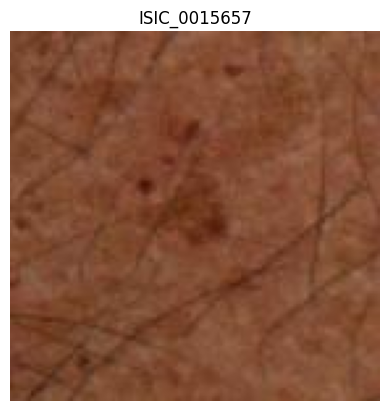

name = ISIC_0015729, 
 dataset = <HDF5 dataset "ISIC_0015729": shape (), type "|S2102"> 
 shape = ()
Shape of the image: (125, 125, 3)


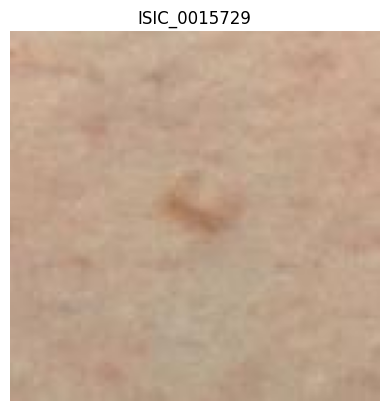

name = ISIC_0015740, 
 dataset = <HDF5 dataset "ISIC_0015740": shape (), type "|S3171"> 
 shape = ()
Shape of the image: (119, 119, 3)


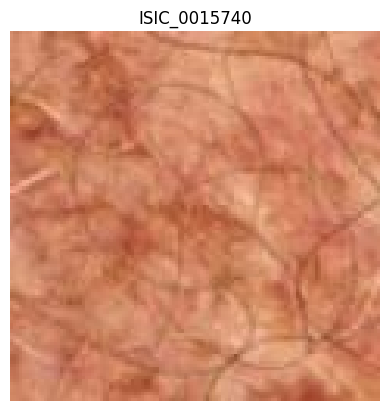

In [4]:
file_path = '../isic-2024-challenge/test-image.hdf5'
images = {}
with h5py.File(file_path, 'r') as file:
    for name, dataset in file.items():
        
        print(f'name = {name}, \n dataset = {dataset} \n shape = {dataset.shape}' )
        
        image_arr_bytes = dataset[()]
        # print(f"image array bytes = {image_arr_bytes[:10]}")
               
        for name, val in  dataset.attrs.items():
            print (name, val)
            
        # Convert the byte array to a PIL image
        image = Image.open(io.BytesIO(image_arr_bytes))
        
        # Convert PIL image to a NumPy array
        image_array = np.array(image)
        
        # Store the image in the dictionary
        images[name] = image_array
        
        # Print the shape of the image
        print(f"Shape of the image: {image_array.shape}")

        # Display the image using matplotlib
        plt.imshow(image)
        plt.title(name)
        plt.axis('off')  # Hide axes
        plt.show()

The test image data have different size. 

In [5]:
test_metadata = pd.read_csv('../isic-2024-challenge/test-metadata.csv')
print(test_metadata.shape)
test_metadata.head()

(3, 44)


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [6]:
sample_submission = pd.read_csv('../isic-2024-challenge/sample_submission.csv')
print(sample_submission.shape)
print(sample_submission.head())

(3, 2)
        isic_id  target
0  ISIC_0015657     0.3
1  ISIC_0015729     0.3
2  ISIC_0015740     0.3


### Training meta-data EDA

In [7]:
train_metadata.shape

(401059, 55)

In [8]:
(train_metadata.isna().sum() / train_metadata.shape[0]).sort_values(ascending=False)

iddx_5                          0.999998
mel_mitotic_index               0.999868
mel_thick_mm                    0.999843
iddx_4                          0.998626
iddx_3                          0.997345
iddx_2                          0.997337
lesion_id                       0.945001
sex                             0.028716
anatom_site_general             0.014352
age_approx                      0.006977
tbp_lv_norm_color               0.000000
tbp_lv_stdL                     0.000000
tbp_lv_radial_color_std_max     0.000000
tbp_lv_perimeterMM              0.000000
isic_id                         0.000000
tbp_lv_norm_border              0.000000
tbp_lv_nevi_confidence          0.000000
tbp_lv_symm_2axis               0.000000
tbp_lv_stdLExt                  0.000000
copyright_license               0.000000
tbp_lv_symm_2axis_angle         0.000000
tbp_lv_x                        0.000000
tbp_lv_y                        0.000000
tbp_lv_z                        0.000000
attribution     

Only a couple of columns with high number of missing values: 
- `iddx_5`, `mel_mitotic_index`, `mel_thick_mm`, `iddx_4`, `iddx_3`, `iddx_2` columns have over 99% of missing values. It seems like most of the patients only have first level lesion diagnosis and don't have data on mitotic index of invasive malignant melanomas or the thickness in depth of melanoma invasion. It appears that these fields are only presented in the training data 
- Other fields with missing values include `lesion_id`, `sex`, `anatom_site_general`, and `age_approx`. These fields are presented in both training and testing dataset. 

**How to treat these missing values?**  

#### Univariate Distribution 

In [9]:
train_metadata['iddx_1'].value_counts()

Benign           400552
Malignant           393
Indeterminate       114
Name: iddx_1, dtype: int64

0    0.99902
1    0.00098
Name: target, dtype: float64


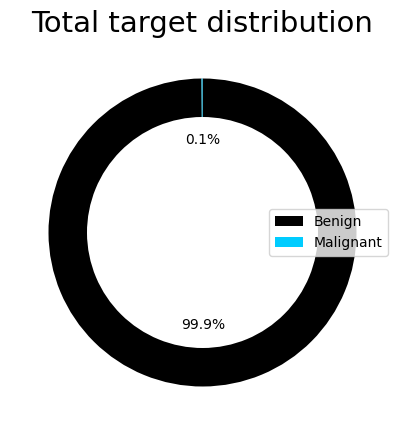

In [10]:
base_color = '#00ccff'
name = ['Benign', 'Malignant']
Title_size = 21
p=['black', base_color]

print(train_metadata.target.value_counts(normalize=True))
plt.figure(figsize = (5, 5))
plt.pie(train_metadata.target.value_counts(normalize=True), autopct = '%1.1f%%', 
colors = sns.color_palette(p), startangle=90, wedgeprops=dict(width=0.25), labeldistance=1.2, 
counterclock=False, radius=1)
plt.title(f'Total target distribution', color='black', fontsize=Title_size)
plt.legend(name, loc='center right', markerscale = 3, framealpha=0.8, facecolor='white')

The target distribution is imbalanced and it's an issue that need to be treated. 

In [11]:
pd.pivot_table(train_metadata, index='iddx_1', values='target', aggfunc='count')

,target
iddx_1,
Benign,400552
Indeterminate,114
Malignant,393


In [12]:
train_metadata['image_type'].value_counts() # image type are the same, will need to drop this column

TBP tile: close-up    401059
Name: image_type, dtype: int64

In [13]:
train_metadata['attribution'].value_counts() # image sources, will need to code this column

Memorial Sloan Kettering Cancer Center                                                                                                                 129068
Department of Dermatology, Hospital Clínic de Barcelona                                                                                                105724
University Hospital of Basel                                                                                                                            65218
Frazer Institute, The University of Queensland, Dermatology Research Centre                                                                             51768
ACEMID MIA                                                                                                                                              28665
ViDIR Group, Department of Dermatology, Medical University of Vienna                                                                                    12640
Department of Dermatology, University of Athens, And

In [14]:
train_metadata['copyright_license'].value_counts() # copyright, will need to code this column

CC-BY       188812
CC-BY-NC    183582
CC-0         28665
Name: copyright_license, dtype: int64

Indeterminate cases are classified as benign cases!!

<Axes: >

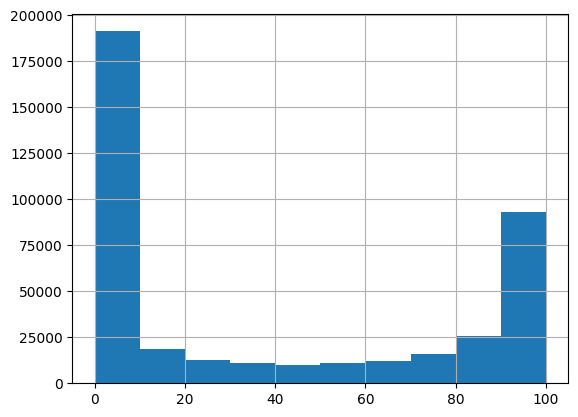

In [15]:
train_metadata['tbp_lv_nevi_confidence'].hist() 

Field definicaiton: Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist. 
It looks like it either have high confidence or low confidence. Would be interested to see how this confidence level is related to other factors about the image, such as location, size, color, and border condition. 

In [16]:
train_metadata.sex.value_counts(normalize=True)

male      0.681688
female    0.318312
Name: sex, dtype: float64

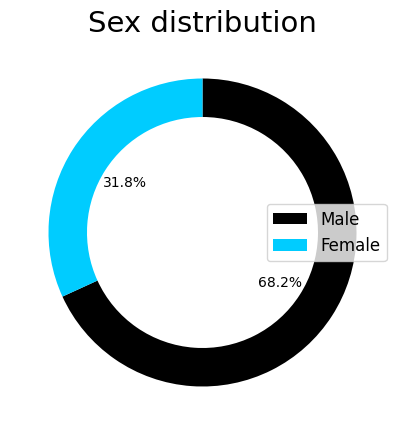

In [17]:
base_color = '#00ccff'
name = ['Male', 'Female']
Title_size=21
#p=[base_color, 'black']
p=['black',base_color]

plt.figure(figsize = (5, 5))
plt.pie(train_metadata.sex.value_counts(normalize=True), autopct = '%1.1f%%', 
colors = sns.color_palette(p), startangle=90, wedgeprops=dict(width=0.25), labeldistance=1.2, 
counterclock=False, radius=1)
plt.title(f'Sex distribution', color='black', fontsize=Title_size)
plt.legend(name, loc='center right',  prop={'size': 12}, markerscale = 3, framealpha=0.8, facecolor='white')

Training data includes 68.2% of male and 31.8% of female. 

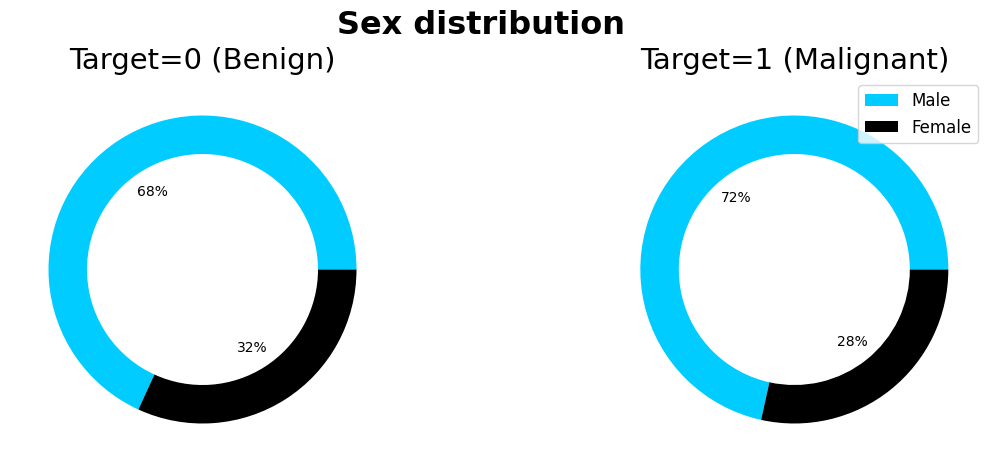

In [18]:
plt.figure(figsize = (14, 5))
Title_size=21

name = ['Male', 'Female']
p_r=[base_color, 'black']
plt.suptitle("Sex distribution", fontsize=Title_size+2, fontweight='bold', y=1.015)

plt.subplot(1,2, 1)
plt.pie(train_metadata[train_metadata.target==0].sex.value_counts(normalize=True), autopct = '%1.0f%%', colors =p_r, 
        wedgeprops=dict(width=0.25))
plt.title(f'Target=0 (Benign)', color='black', fontsize=Title_size)

plt.subplot(1,2, 2)
plt.pie(train_metadata[train_metadata.target==1].sex.value_counts(normalize=True), autopct = '%1.0f%%', colors =p_r, 
        wedgeprops=dict(width=0.25))
plt.title(f'Target=1 (Malignant)', color='black', fontsize=Title_size)

plt.legend(name, loc='upper right',  prop={'size': 12}, markerscale = 3, framealpha=0.8, facecolor='white')
plt.show()

Males are more prevalent in both benign and malignant cases, with a slightly higher proportion in the malignant group.

<Axes: >

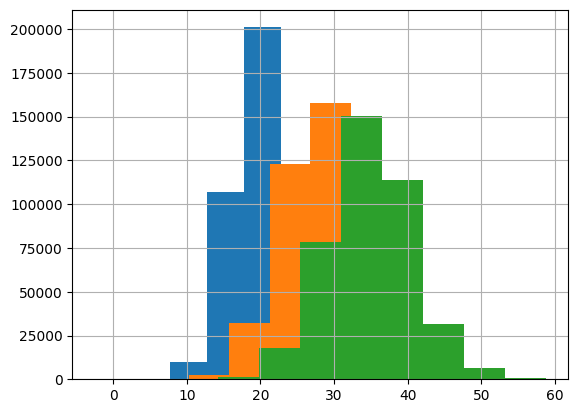

In [19]:
train_metadata['tbp_lv_A'].hist()
train_metadata['tbp_lv_B'].hist()
train_metadata['tbp_lv_C'].hist()

<Axes: >

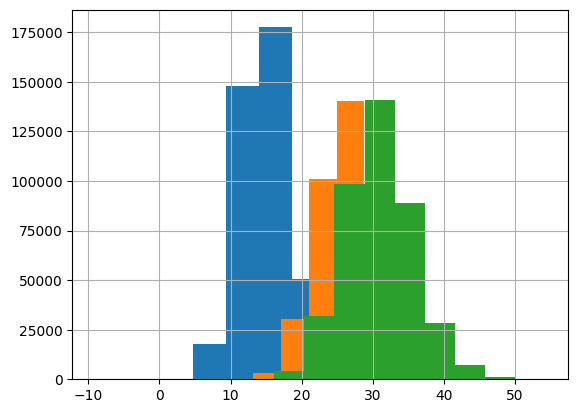

In [20]:
train_metadata['tbp_lv_Aext'].hist()
train_metadata['tbp_lv_Bext'].hist()
train_metadata['tbp_lv_Cext'].hist()

Will need to look into what these columns mean

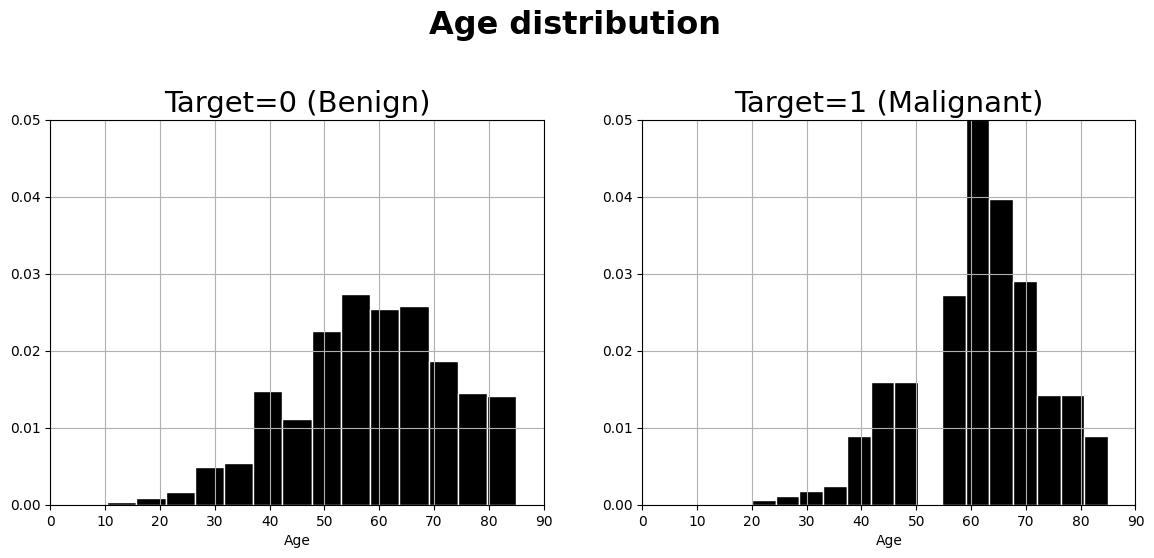

In [21]:
ymax = 0.05 
xmax = 90
bins = 15
plt.figure(figsize = (14, 5))
plt.suptitle("Age distribution", fontsize=Title_size+2, fontweight='bold', y=1.1)

plt.subplot(1,2, 1)
train_metadata[train_metadata.target==0].age_approx.hist(color = 'black',  edgecolor = 'white', density=True, bins=bins)
plt.xlabel(f'Age', fontsize=10, color = 'black')
plt.title(f'Target=0 (Benign)', color='black', fontsize=Title_size)
plt.ylim([0, ymax])
plt.xlim([0, xmax])

plt.subplot(1,2, 2)
train_metadata[train_metadata.target==1].age_approx.hist(color = 'black',  edgecolor = 'white', density=True, bins=bins)
plt.title(f'Target=1 (Malignant)', color='black', fontsize=Title_size)
plt.ylim([0, ymax])
plt.xlim([0, xmax])
plt.xlabel(f'Age', fontsize=10, color = 'black')

plt.show()

In [22]:
train_metadata.groupby('target')['age_approx'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,397871.0,58.009694,13.597301,5.0,50.0,60.0,70.0,85.0
1,390.0,61.371795,11.932877,20.0,55.0,60.0,70.0,85.0


The dataset contain patients across different age groups, while concentrated with older people with age more than 50. 
The milignant cases concentrated around 60. 

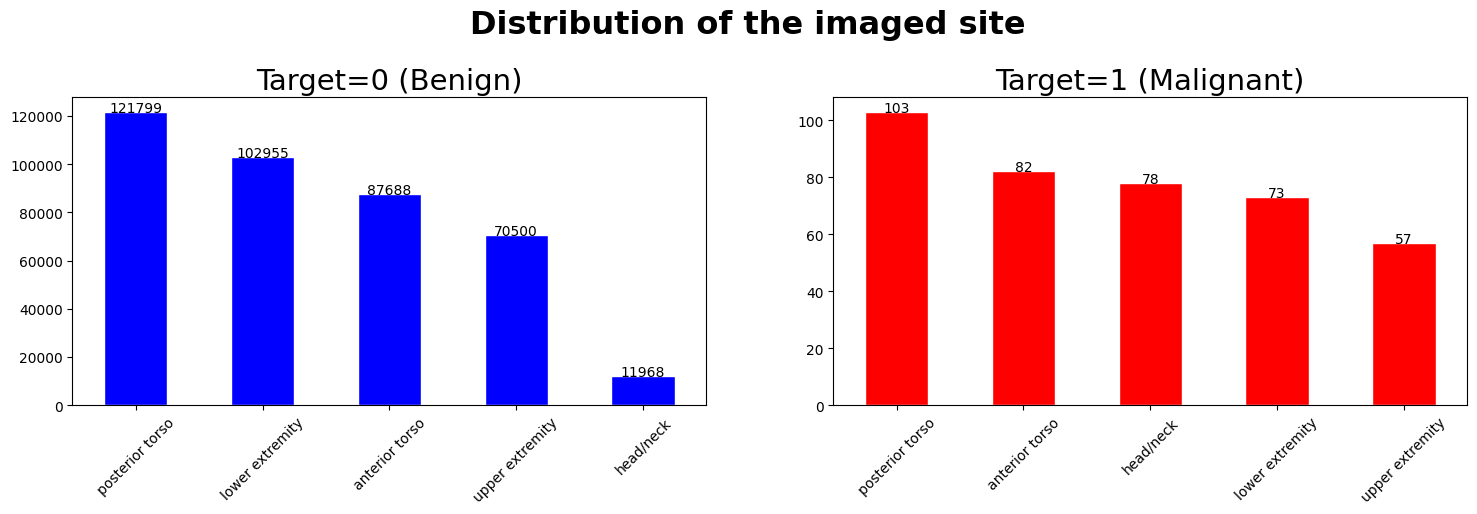

In [23]:
plt.figure(figsize = (18, 4))
plt.suptitle("Distribution of the imaged site", fontsize=Title_size+2, fontweight='bold', y=1.1)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

plt.subplot(1,2, 1)
train_metadata[train_metadata.target == 0].anatom_site_general.sort_values(ascending=False).value_counts().plot(kind='bar', 
                                                                                            color='blue', edgecolor='white')
x = train_metadata[train_metadata.target == 0].anatom_site_general.sort_values(ascending=False).value_counts().index
y = train_metadata[train_metadata.target == 0].anatom_site_general.sort_values(ascending=False).value_counts().values
addlabels(x, y)
plt.title(f'Target=0 (Benign)', color='black', fontsize=Title_size)
plt.xticks(rotation=45)

plt.subplot(1,2, 2)
train_metadata[train_metadata.target == 1].anatom_site_general.sort_values(ascending=False).value_counts().plot(kind='bar', 
                                                                                            color='red', edgecolor='white')
x = train_metadata[train_metadata.target == 1].anatom_site_general.sort_values(ascending=False).value_counts().index
y = train_metadata[train_metadata.target == 1].anatom_site_general.sort_values(ascending=False).value_counts().values
addlabels(x, y)
plt.title(f'Target=1 (Malignant)', color='black', fontsize=Title_size)
plt.xticks(rotation=45)

plt.show()

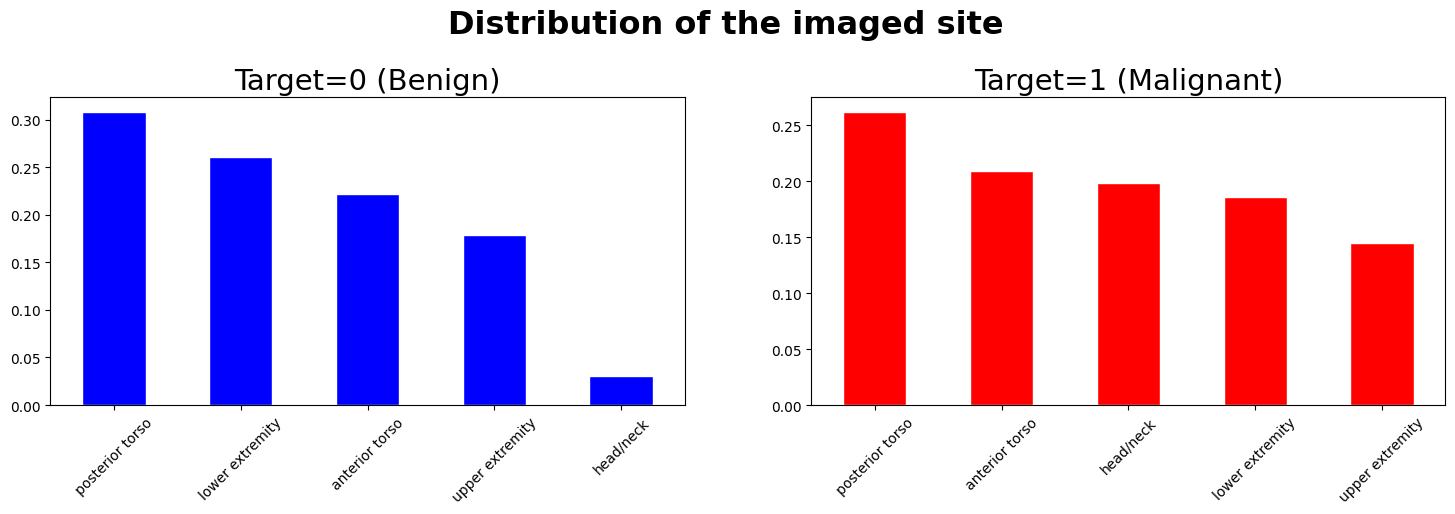

In [24]:
plt.figure(figsize = (18, 4))
plt.suptitle("Distribution of the imaged site", fontsize=Title_size+2, fontweight='bold', y=1.1)

plt.subplot(1,2, 1)
train_metadata[train_metadata.target == 0].anatom_site_general.sort_values(ascending=False).value_counts(normalize=True).plot(kind='bar', 
                                                                                            color='blue', edgecolor='white')
plt.title(f'Target=0 (Benign)', color='black', fontsize=Title_size)
plt.xticks(rotation=45)

plt.subplot(1,2, 2)
train_metadata[train_metadata.target == 1].anatom_site_general.sort_values(ascending=False).value_counts(normalize=True).plot(kind='bar', 
                                                                                            color='red', edgecolor='white')
plt.title(f'Target=1 (Malignant)', color='black', fontsize=Title_size)
plt.xticks(rotation=45)

plt.show()

In [25]:
(train_metadata.groupby('target')['anatom_site_general'].value_counts()[1] / train_metadata.groupby('target')['anatom_site_general'].value_counts()[0]) * 100

anatom_site_general
anterior torso     0.093513
head/neck          0.651738
lower extremity    0.070905
posterior torso    0.084566
upper extremity    0.080851
Name: anatom_site_general, dtype: float64

Where are the image site more prevalent among benign and malignant cases? 
It looks like posterior torso area are the most prevalent amoung benign and malignant cases because more pictures are taken around this area. However, it seems like anterior torso and head/ neck area are disproportionally having higher number of malignant cases despite lower number of image taken compared to upper extremity and head/ neck. It would be interested in seeing if this is the case in the testing dataset.

#### Multivariable Distributions

In [26]:
def box_distr(data, f_x, f_y, split, t, l):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=split, y=f_y, data=data, palette=p, hue=f_x, medianprops={"color": "r", "linewidth": 1}, 
                showcaps=True, linewidth=0.7, flierprops={"marker": "x", 'markersize':3}, width=0.6)
    plt.title(f'{t}')
    # plt.xlabel('Target Class')
    plt.ylabel(f'{f_y}')
    plt.xticks(rotation=45)
    plt.legend(loc=l,  prop={'size': 10}, markerscale = 1, framealpha=0.8)

    plt.show()

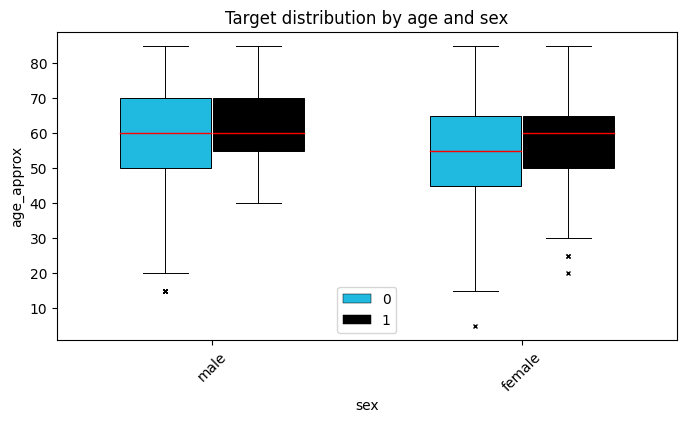

In [27]:
p = [base_color, 'black', '#cccccc']
f_x = 'target'
f_y = 'age_approx' # 'clin_size_long_diam_mm'
split = 'sex'
box_distr(train_metadata, f_x, f_y, split, 'Target distribution by age and sex', 'lower center')

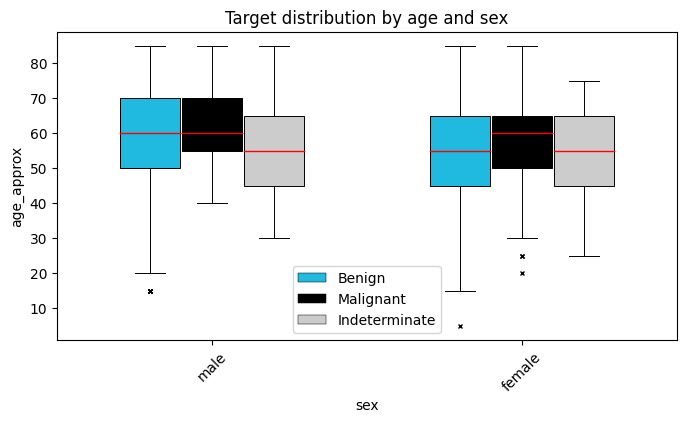

In [28]:
p = [base_color, 'black', '#cccccc']
f_x = 'iddx_1'
f_y = 'age_approx' # 'clin_size_long_diam_mm'
split = 'sex'
box_distr(train_metadata, f_x, f_y, split, 'Target distribution by age and sex', 'lower center')

Female patients with maglinant cases tend to have older age. 

##### Location Factor
- Use coordinate data for visualization 
- Columns related to location: `anatom_site_general`, `tbp_lv_location`, `tbp_lv_location_simple` 

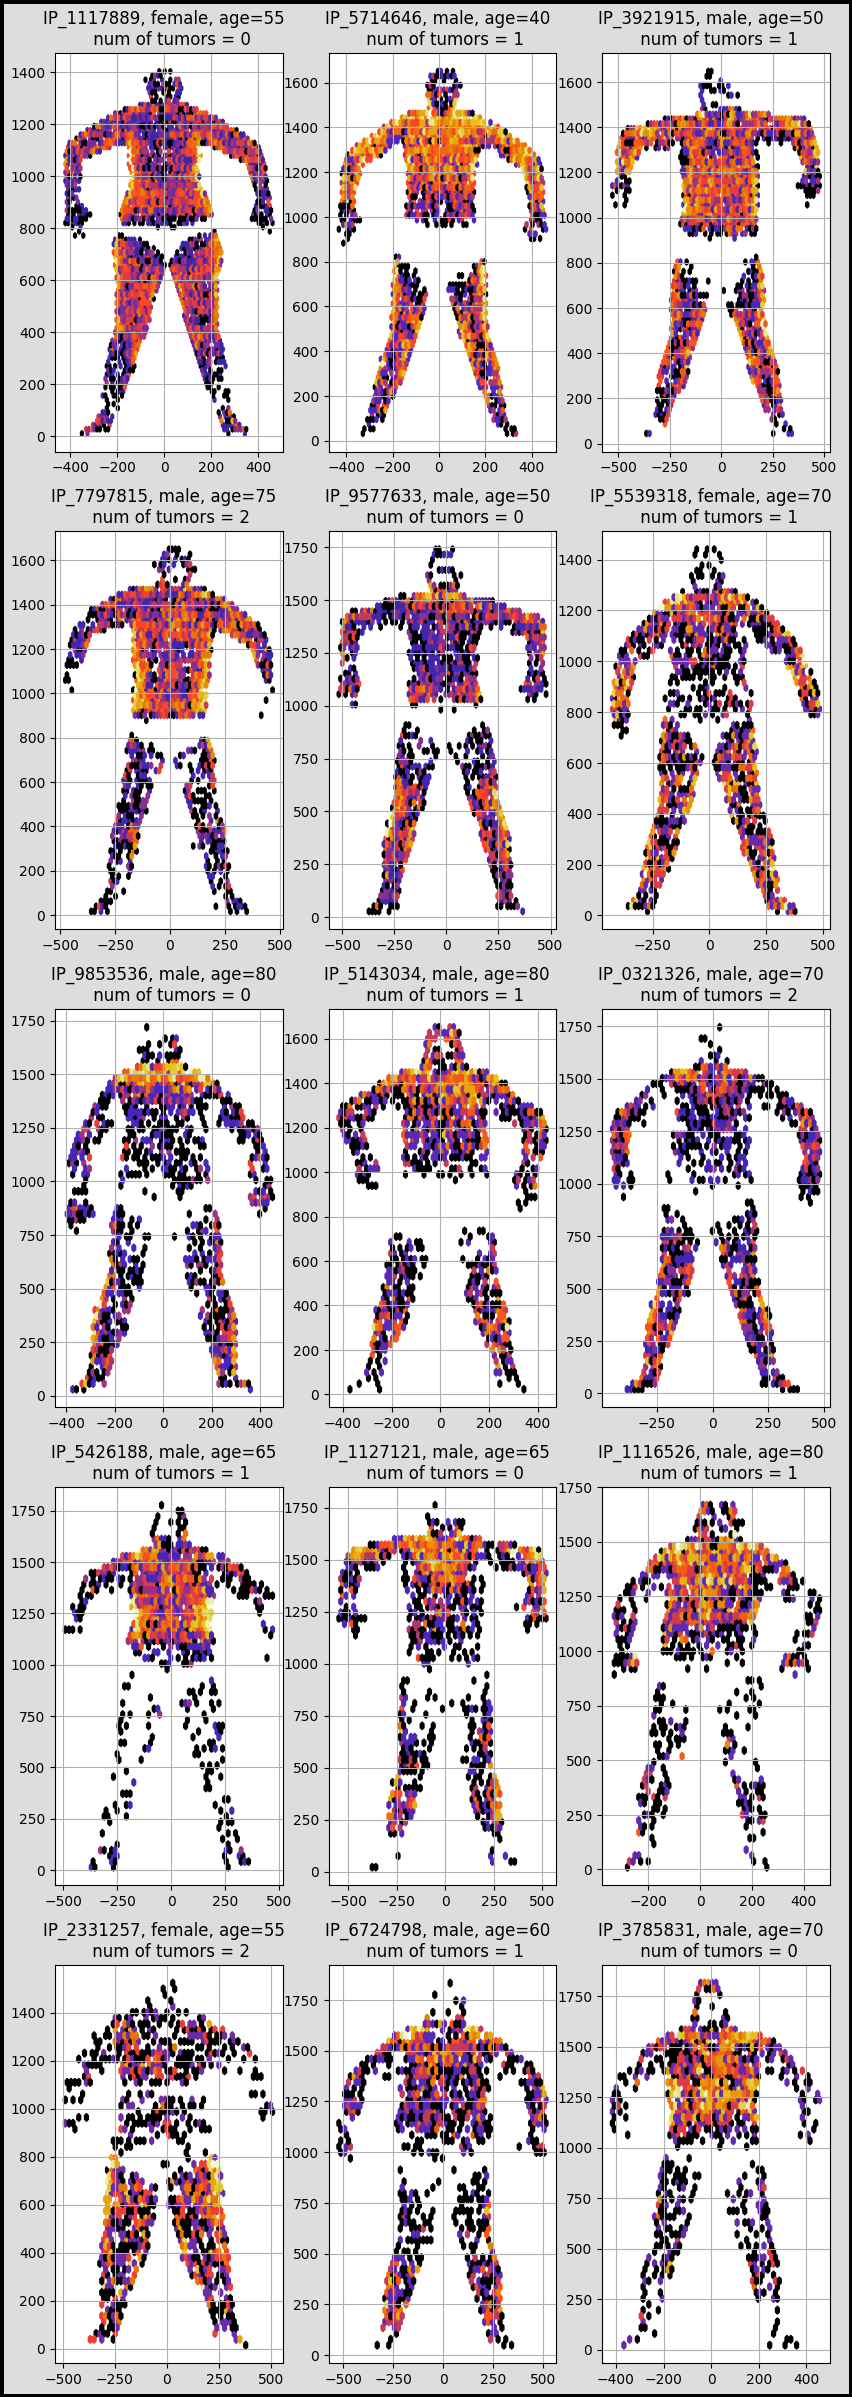

In [29]:
k = 5  # num of row
l = 3 # num of columns
n = k * l
most_common_patients = train_metadata['patient_id'].value_counts().head(n)
most_common_patients
m=1
fig = plt.figure(figsize=(10, 30))
for patient_id in most_common_patients.index:
    plt.subplot(k, l, m)
    d=train_metadata.query('patient_id == @patient_id')
    plt.hexbin(data=d, x='tbp_lv_x', y='tbp_lv_y',  gridsize=int(75*(len(d)/9184)**0.20), cmap='CMRmap', bins='log', alpha = 1)
    
    s=d[d.patient_id==patient_id].target.sum()
    as1 = d[d.patient_id==patient_id].sex.unique()[0]
    age = d[d.patient_id==patient_id].age_approx.unique()[0]
    plt.title(f'{patient_id}, {as1}, age={int(age)}  \n num of tumors = {s}')
    #plt.rcParams['axes.facecolor'] = 'lightgrey'
    #plt.grid(color='white')
    plt.grid()
    m=m+1
    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('#000000') 
    fig.patch.set_facecolor('#dddddd')
plt.show()

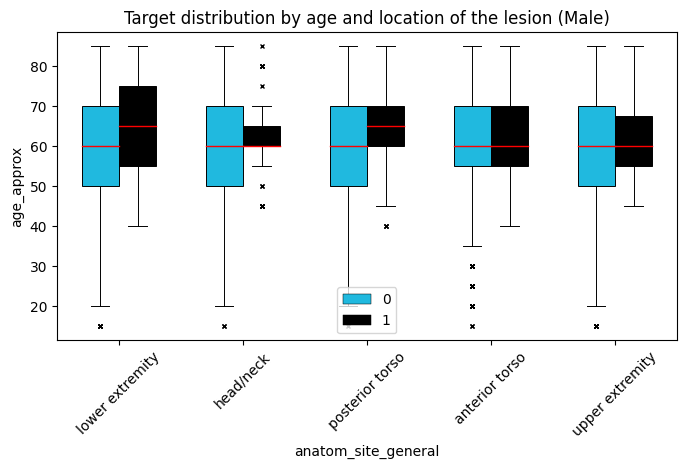

In [30]:
male = train_metadata[train_metadata['sex'] == 'male']
f_x = 'target'
f_y = 'age_approx' # 'clin_size_long_diam_mm'
split = 'anatom_site_general'

box_distr(male, f_x, f_y, split, 'Target distribution by age and location of the lesion (Male)',  'lower center')

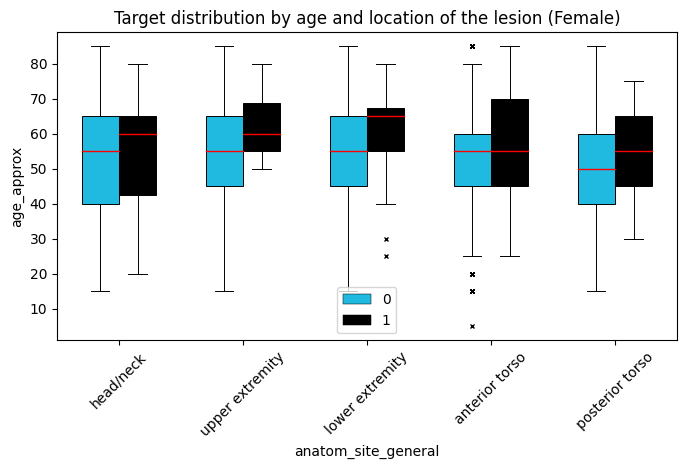

In [31]:
female = train_metadata[train_metadata['sex'] == 'female']
f_x = 'target'
f_y = 'age_approx' # 'clin_size_long_diam_mm'
split = 'anatom_site_general'

box_distr(female, f_x, f_y, split, 'Target distribution by age and location of the lesion (Female)',  'lower center')

Older male with image taken from lower extremity and posterior torso are more likely to be maglignant. 
Older female with image take from every sites except anterior torso are more likley to be maglignant. 

In [32]:
train_metadata.groupby('tbp_lv_location_simple')['tbp_lv_location'].value_counts()

tbp_lv_location_simple  tbp_lv_location        
Head & Neck             Head & Neck                12046
Left Arm                Left Arm - Upper           22816
                        Left Arm - Lower           11939
                        Left Arm                    1593
Left Leg                Left Leg - Lower           27428
                        Left Leg - Upper           23673
                        Left Leg                    1974
Right Arm               Right Arm - Upper          22972
                        Right Arm - Lower          10636
                        Right Arm                    601
Right Leg               Right Leg - Lower          25208
                        Right Leg - Upper          23034
                        Right Leg                   1711
Torso Back              Torso Back Top Third       71112
                        Torso Back Middle Third    46185
                        Torso Back Bottom Third     4596
                        Torso Back      

`tbp_lv_location_simple` is a higher level categorization of `tbp_lv_location` - could dive deep to see the detailed attributes of where those malignant cases are. 

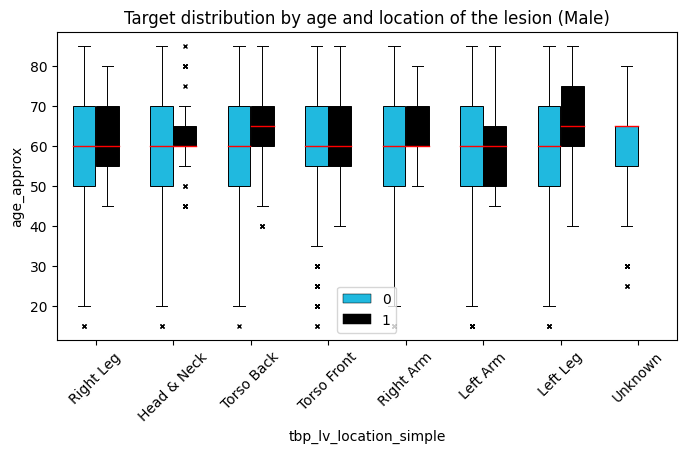

In [33]:
male = train_metadata[train_metadata['sex'] == 'male']
f_x = 'target'
f_y = 'age_approx' 
split = 'tbp_lv_location_simple'

box_distr(male, f_x, f_y, split, 'Target distribution by age and location of the lesion (Male)',  'lower center')

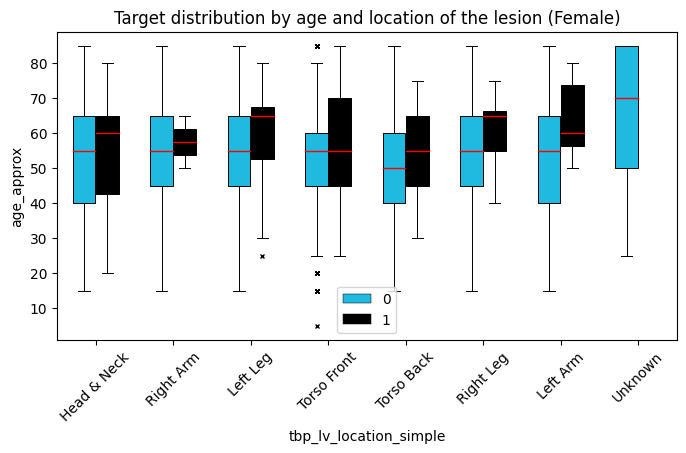

In [34]:
female = train_metadata[train_metadata['sex'] == 'female']
f_x = 'target'
f_y = 'age_approx' 
split = 'tbp_lv_location_simple'

box_distr(female, f_x, f_y, split, 'Target distribution by age and location of the lesion (Female)',  'lower center')

Classification of anatomical location fields: `tbp_lv_location_simple` 
In male and female patients, similar age distribution can be seen comparing benign and malignant cases, splitting with the simple locations. 
Male patients that have anatomical location at torso back and left leg tend to have a higher age and more likely to be malignant cases. 
Female patients that have anatomical location a few different areas tend to have a higher age and more likely to be malignant cases. 

##### Size factor
Parameters related to size: 
- `tbp_lv_areaMM2`, `clin_size_long_diam_mm`, `tbp_lv_perimeterMM`, `tbp_lv_minorAxisMM`

Check the distribution of these 4 columns: 

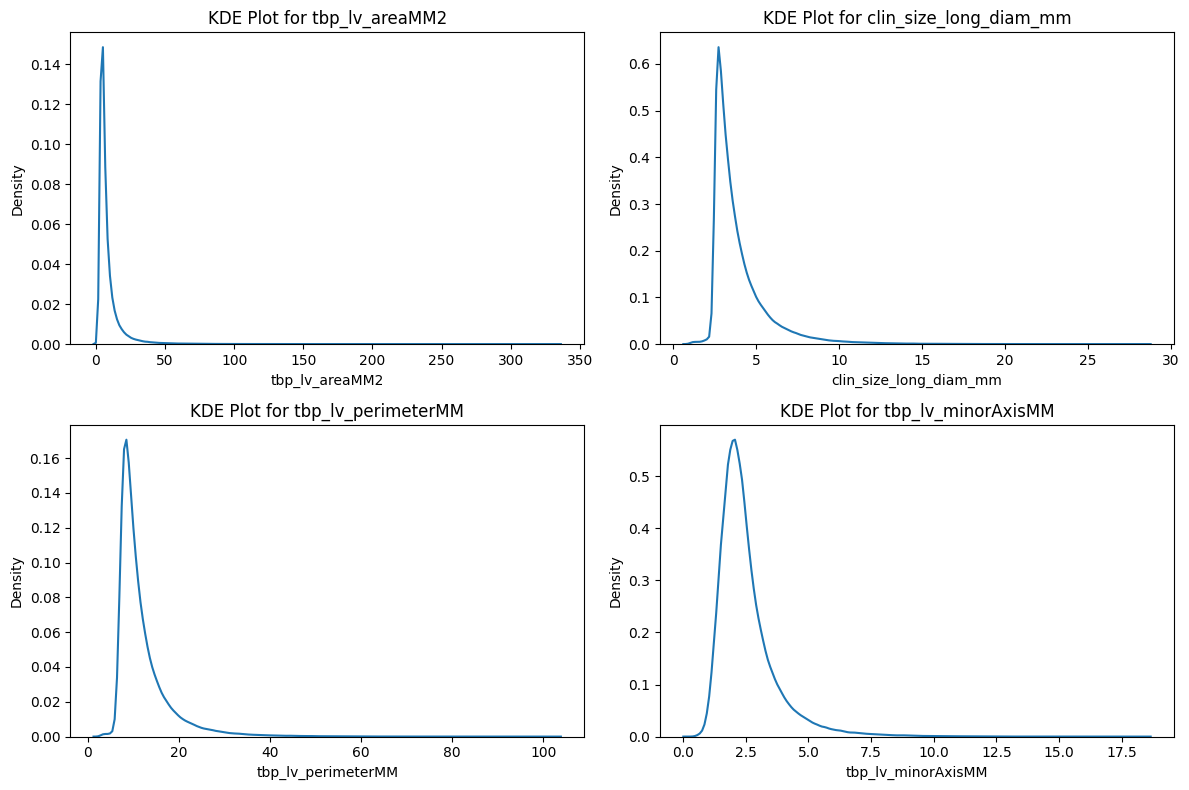

In [42]:
plt.figure(figsize=(12, 8))

# KDE plot for tbp_lv_areaMM2
plt.subplot(2, 2, 1)
sns.kdeplot(data=train_metadata, x='tbp_lv_areaMM2')
plt.xlabel('tbp_lv_areaMM2')
plt.title('KDE Plot for tbp_lv_areaMM2')

# KDE plot for clin_size_long_diam_mm
plt.subplot(2, 2, 2)
sns.kdeplot(data=train_metadata, x='clin_size_long_diam_mm')
plt.xlabel('clin_size_long_diam_mm')
plt.title('KDE Plot for clin_size_long_diam_mm')

# KDE plot for tbp_lv_perimeterMM
plt.subplot(2, 2, 3)
sns.kdeplot(data=train_metadata, x='tbp_lv_perimeterMM')
plt.xlabel('tbp_lv_perimeterMM')
plt.title('KDE Plot for tbp_lv_perimeterMM')

# KDE plot for tbp_lv_minorAxisMM
plt.subplot(2, 2, 4)
sns.kdeplot(data=train_metadata, x='tbp_lv_minorAxisMM')
plt.xlabel('tbp_lv_minorAxisMM')
plt.title('KDE Plot for tbp_lv_minorAxisMM')

plt.tight_layout()
plt.show()

The distributions of these size-related columns are positive skewed (right-skewed).

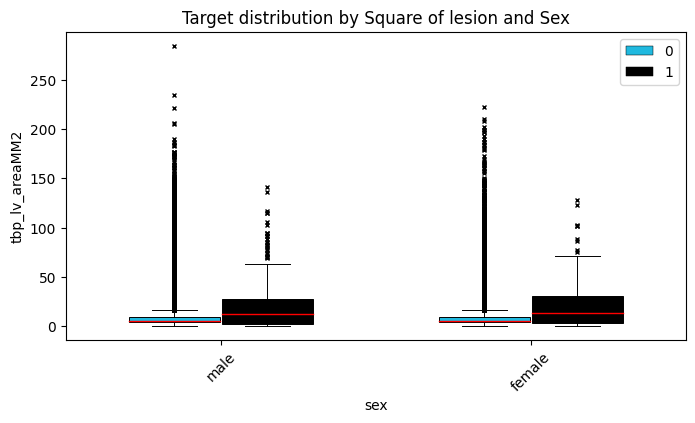

In [35]:
f_x = 'target'
f_y = 'tbp_lv_areaMM2' 
split = 'sex' 

box_distr(train_metadata, f_x, f_y, split, 'Target distribution by Square of lesion and Sex',  'upper right')

In both male and female patients, the size of lesion appears to be larger in the malignant cases. However, there are a lot of benign cases that have relatively large size. 

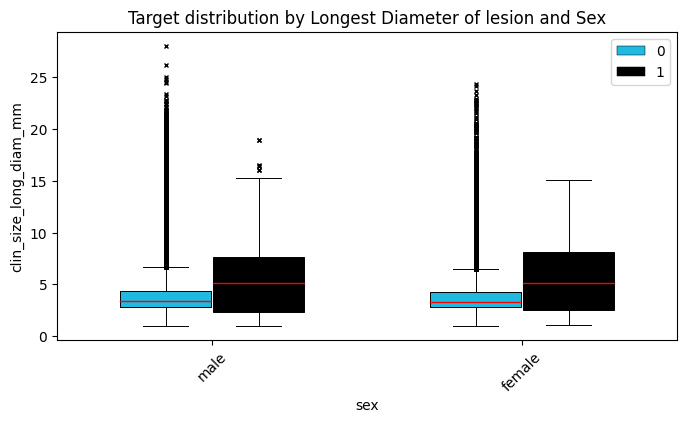

In [36]:
f_x = 'target'
f_y = 'clin_size_long_diam_mm' 
split = 'sex' 

box_distr(train_metadata, f_x, f_y, split, 'Target distribution by Longest Diameter of lesion and Sex',  'upper right')

Simliar pattern appears in the parameter that describe the maximum diameter of the lesion. 

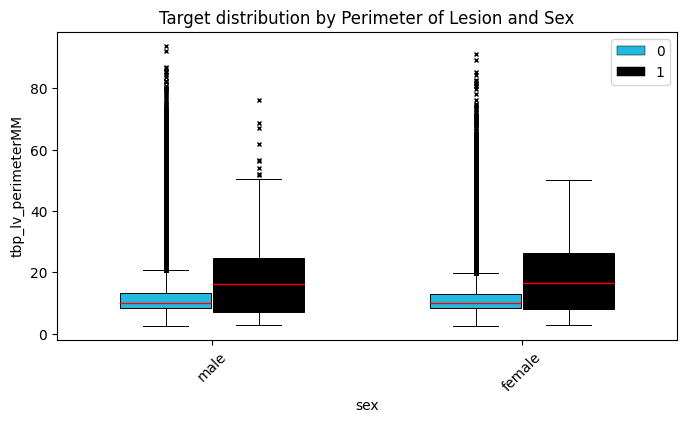

In [37]:
f_x = 'target'
f_y = 'tbp_lv_perimeterMM' 
split = 'sex' 

box_distr(train_metadata, f_x, f_y, split, 'Target distribution by Perimeter of Lesion and Sex',  'upper right')

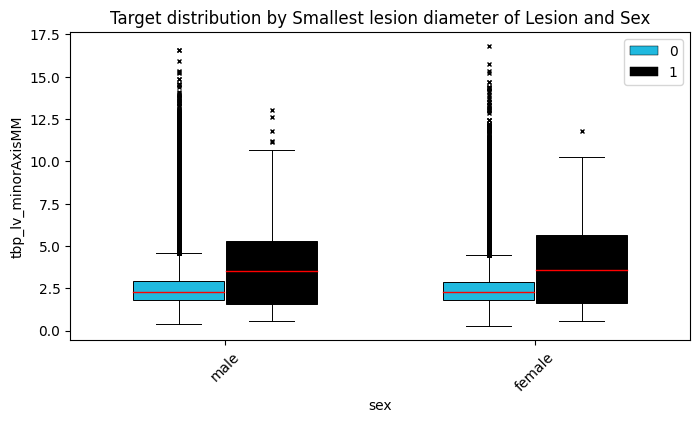

In [38]:
f_x = 'target'
f_y = 'tbp_lv_minorAxisMM'
split = 'sex' 

box_distr(train_metadata, f_x, f_y, split, 'Target distribution by Smallest lesion diameter of Lesion and Sex',  'upper right')

`tbp_lv_areaMM2`, `clin_size_long_diam_mm`, `tbp_lv_perimeterMM`, `tbp_lv_minorAxisMM` measure the size of the lesion. It looks like the larger the lesion, the more likely they are malignant cases in both male and female patients. However, there are a lot of outliers in the benign cases where the area of the lesion is large but benign. 

Check the correlation between these 4 size-related columns:

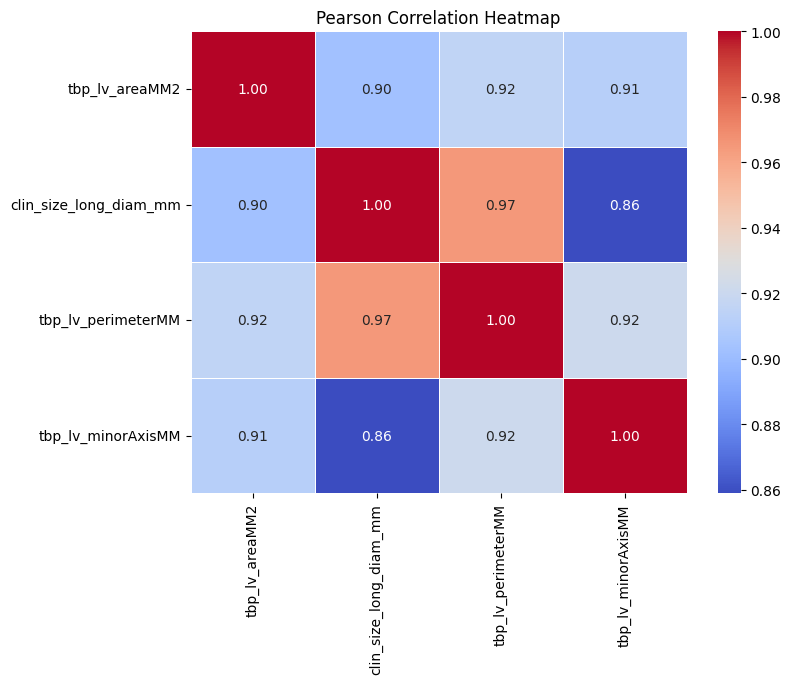

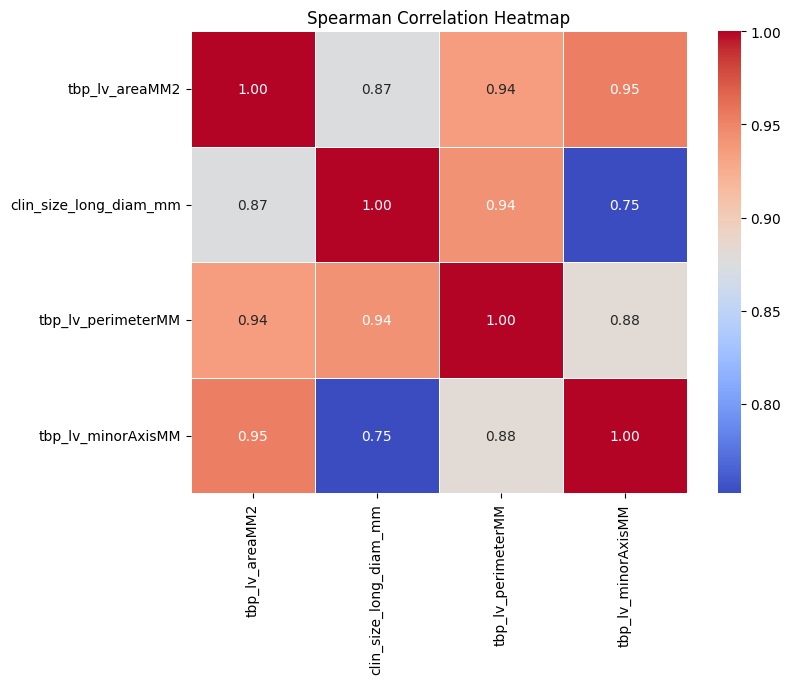

In [41]:
correlation_all_pearson = train_metadata[['tbp_lv_areaMM2', 'clin_size_long_diam_mm', 'tbp_lv_perimeterMM', 'tbp_lv_minorAxisMM']].corr(method='pearson')
correlation_all_spearman = train_metadata[['tbp_lv_areaMM2', 'clin_size_long_diam_mm', 'tbp_lv_perimeterMM', 'tbp_lv_minorAxisMM']].corr(method='spearman')

# Plot correlation_all_pearson heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_all_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot correlation_all_spearman heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_all_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

##### Color factors
Parameters related to color: 
- `tbp_lv_H`: hue inside the lesion. Typical values range from 25 (red) to 75 (brown) 
- `tbp_lv_Hext`: hue outside lesion. 
- `tbp_lv_norm_color`: color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.
- `tbp_lv_radial_color_std_max`: color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. Values range 0-10.
- `tbp_lv_color_std_mean`: color irregularity, calculated as the variance of colors within the lesion's boundary.

Check distribution of these 4 color-related columns:

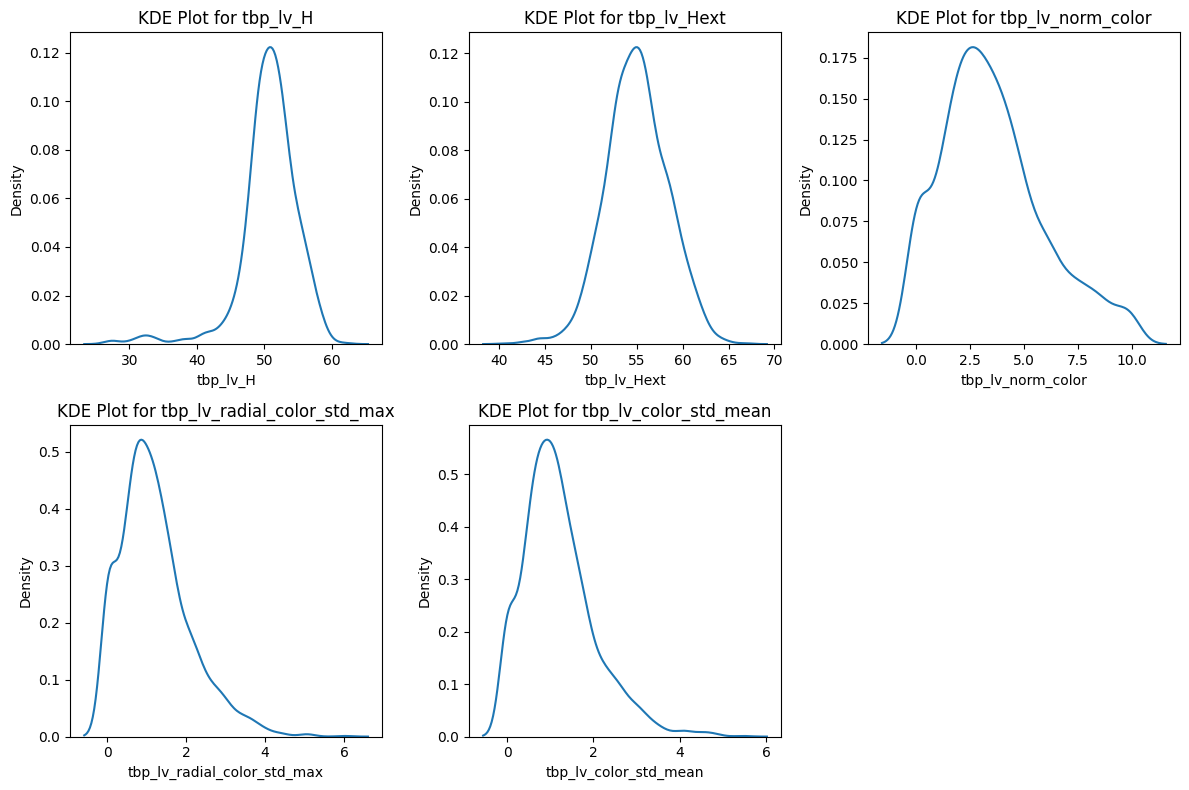

In [44]:
plt.figure(figsize=(12, 8))

# KDE plot for tbp_lv_H
plt.subplot(2, 3, 1)
sns.kdeplot(data=d, x='tbp_lv_H')
plt.xlabel('tbp_lv_H')
plt.title('KDE Plot for tbp_lv_H')

# KDE plot for tbp_lv_Hext
plt.subplot(2, 3, 2)
sns.kdeplot(data=d, x='tbp_lv_Hext')
plt.xlabel('tbp_lv_Hext')
plt.title('KDE Plot for tbp_lv_Hext')

# KDE plot for tbp_lv_norm_color
plt.subplot(2, 3, 3)
sns.kdeplot(data=d, x='tbp_lv_norm_color')
plt.xlabel('tbp_lv_norm_color')
plt.title('KDE Plot for tbp_lv_norm_color')

# KDE plot for tbp_lv_radial_color_std_max
plt.subplot(2, 3, 4)
sns.kdeplot(data=d, x='tbp_lv_radial_color_std_max')
plt.xlabel('tbp_lv_radial_color_std_max')
plt.title('KDE Plot for tbp_lv_radial_color_std_max')

# KDE plot for tbp_lv_radial_color_std_max
plt.subplot(2, 3, 5)
sns.kdeplot(data=d, x='tbp_lv_color_std_mean')
plt.xlabel('tbp_lv_color_std_mean')
plt.title('KDE Plot for tbp_lv_color_std_mean')

plt.tight_layout()
plt.show()

`tbp_lv_H` and `tbp_lv_Hext` look approximately normal, while `tbp_lv_norm_color`, `tbp_lv_radial_color_std_max` and `tbp_lv_color_std_mean` are right skewed. 

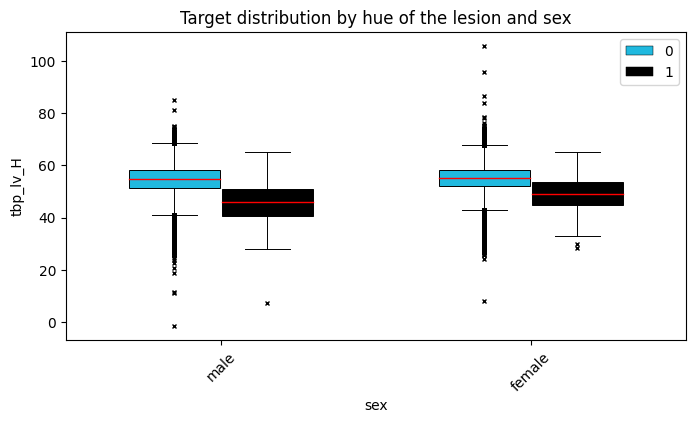

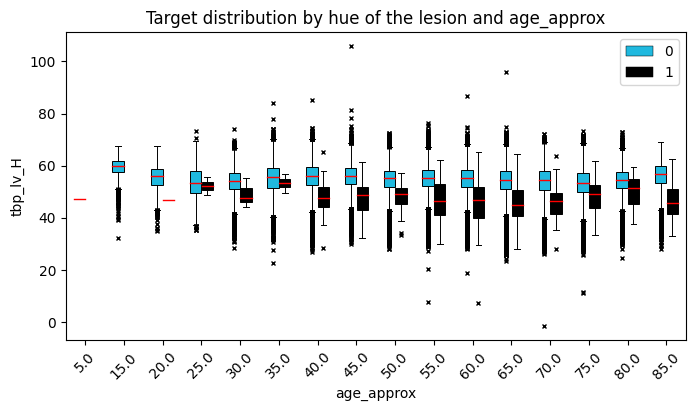

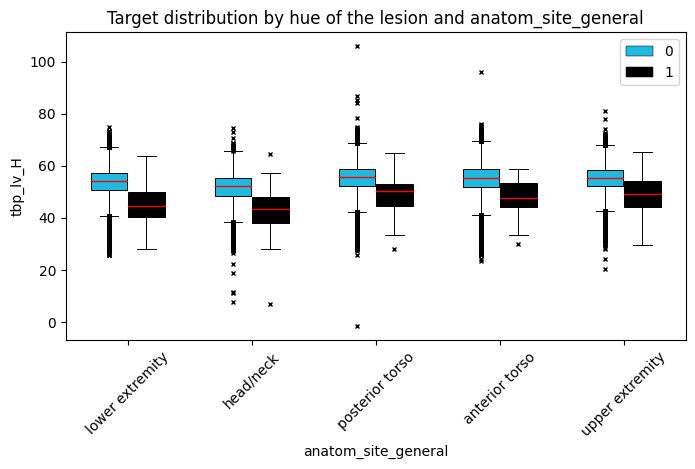

In [53]:
f_x = 'target' 
f_y = 'tbp_lv_H'
splits = ['sex', 'age_approx', 'anatom_site_general']

for split in splits:
    box_distr(train_metadata, f_x, f_y, split, 'Target distribution by hue of the lesion and ' + str(split),  'upper right')

Typical, `tbp_lv_H` values range from 25 (red) to 75 (brown), which means that the higher the value, the darker the color of the lesion is. Looking at the splits by sex, age, and image location: malignant cases tend to have brighter color across these 3 splits.

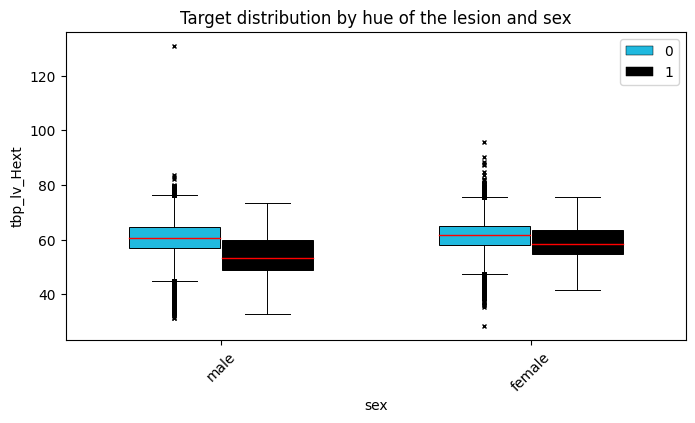

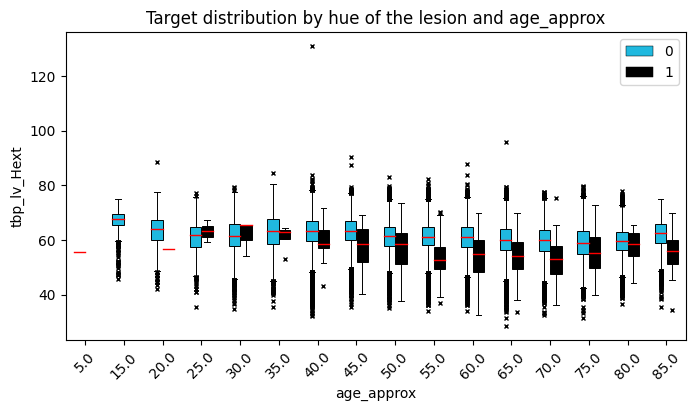

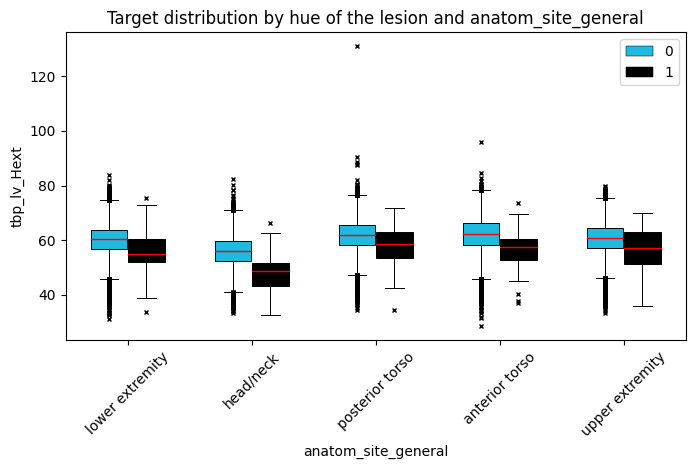

In [54]:
f_x = 'target' 
f_y = 'tbp_lv_Hext'
splits = ['sex', 'age_approx', 'anatom_site_general']

for split in splits:
    box_distr(train_metadata, f_x, f_y, split, 'Target distribution by hue outside lesion and ' + str(split),  'upper right')

Similar pattern appears for `tbp_lv_Hext`, although the difference between malignant and benign cases are not notable for females.  

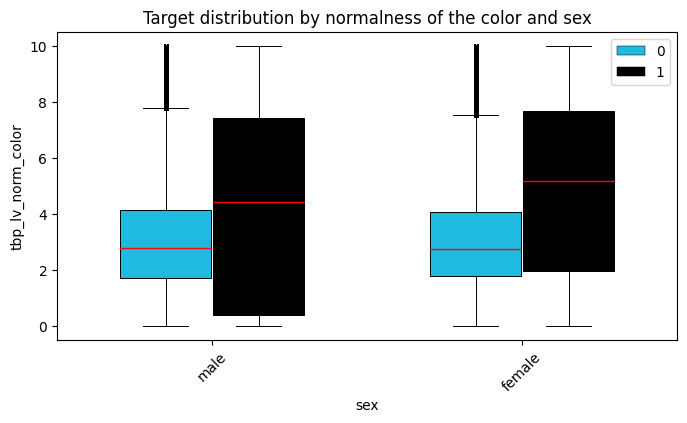

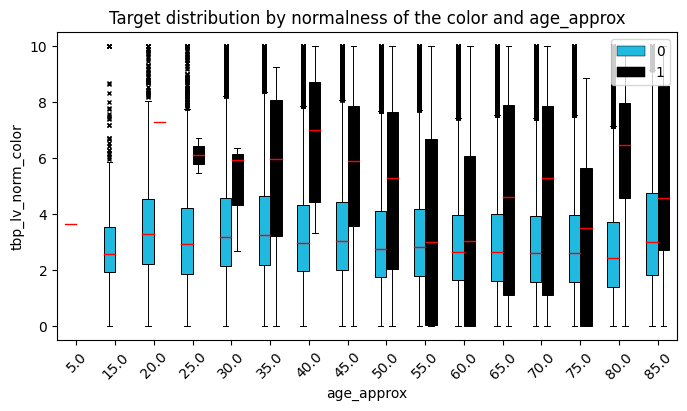

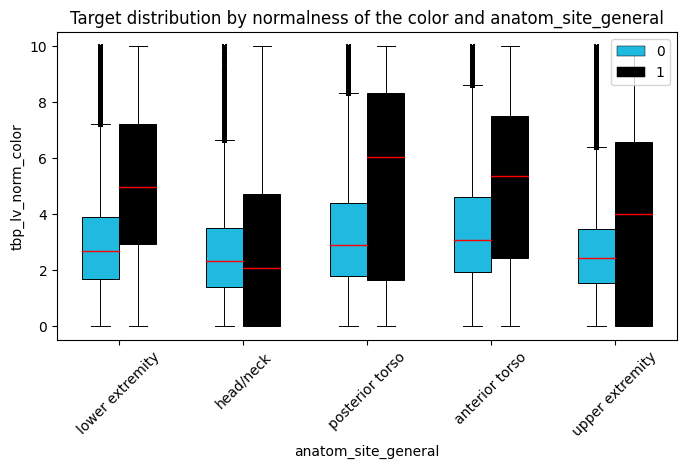

In [58]:
f_x = 'target' 
f_y = 'tbp_lv_norm_color'
splits = ['sex', 'age_approx', 'anatom_site_general']

for split in splits:
    box_distr(train_metadata, f_x, f_y, split, 'Target distribution by normalness of the color and ' + str(split),  'upper right')

Looking at the splits by sex, age, and image location: malignant cases tend to have higher variations in color across these 3 splits.

Check the correlation between these 4 color-related columns:

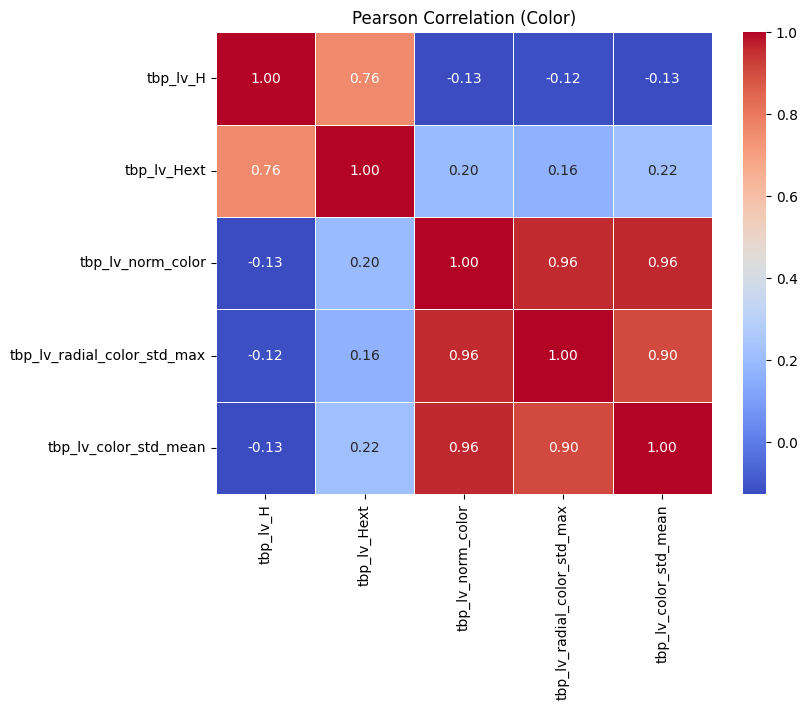

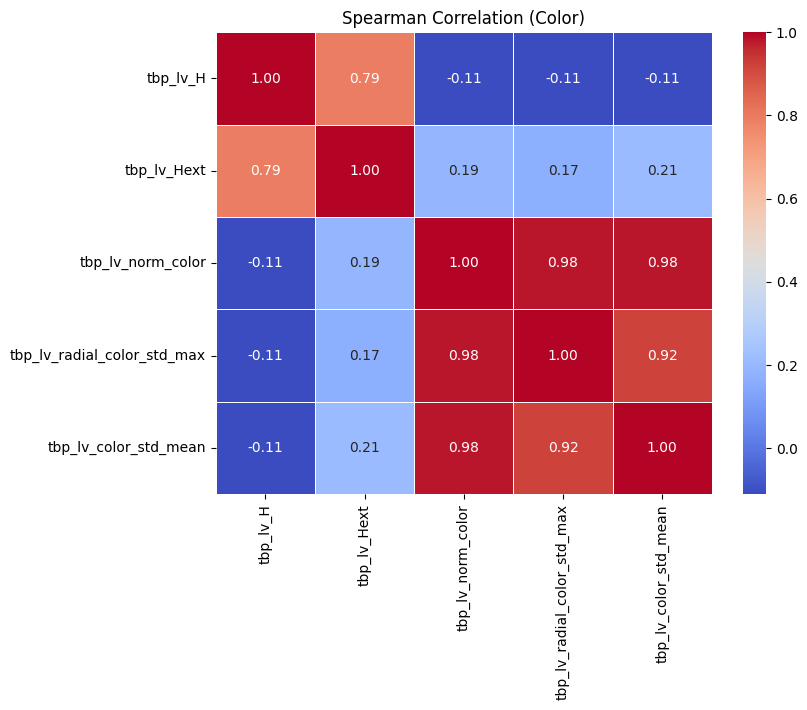

In [45]:
color = ['tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_norm_color', 'tbp_lv_radial_color_std_max', 'tbp_lv_color_std_mean']
correlation_all_pearson = train_metadata[color].corr(method='pearson')
correlation_all_spearman = train_metadata[color].corr(method='spearman')

# Plot correlation_all_pearson heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_all_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation (Color)')
plt.show()

# Plot correlation_all_spearman heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_all_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation (Color)')
plt.show()

Across 5 color-related columns, `tbp_lv_norm_color`, `tbp_lv_radial_color_std_max`, and `tbp_lv_color_std_mean` are highly correlated. These 3 columns show low negative correlation with `tbp_lv_H` and low positive correlation with `tbp_lv_Hext`. `tbp_lv_H` and `tbp_lv_Hext` are highly correlated with each other.

##### Border factors
Parameters related to border: 
- `tbp_lv_area_perim_ratio`, `tbp_lv_deltaA`, `tbp_lv_deltaB`, `tbp_lv_deltaC`, `tbp_lv_deltaLBnorm`, `tbp_lv_norm_border`, `tbp_lv_symm_2axis`

Need to check the predictive power of each bucket separately and the correlation between each bucket of features.

Columns to look more into (meaning & how to put them into bucket) 

#### Comparing distribution of training and testing data 